In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import csv
import json
import requests
import seaborn as sns
import time


In [2]:
data = './output_data/Income_Rent_Output/rental(total)_income_merged.csv' 
project_info = pd.read_csv(data)

pi_2015rent = project_info.sort_values(by='2015 Yearly Rent', ascending=False)
pi_2016rent = project_info.sort_values(by='2016 Yearly Rent', ascending=False)
pi_2017rent = project_info.sort_values(by='2017 Yearly Rent', ascending=False)

pi_2015income = project_info.sort_values(by='2015 Income', ascending=False)
pi_2016income = project_info.sort_values(by='2016 Income', ascending=False)
pi_2017income = project_info.sort_values(by='2017 Income', ascending=False)

pi_2015income.head()

,State,2015 Yearly Rent,2016 Yearly Rent,2017 Yearly Rent,'15-'16 Rent Diff.,'16-'17 Rent Diff.,2015 Income,2016 Income,2017 Income,'15-'16 Income Diff.,'16-'17 Income Diff.
28,New Hampshire,18000.0,18000.0,19500.0,0.0,1500.0,78299,77900,74801,-399,-3099
1,Alaska,20190.0,19800.0,19170.0,-390.0,-630.0,77717,77351,72231,-366,-5120
20,Maryland,20400.0,20340.0,20400.0,-60.0,60.0,76146,75346,81084,-800,5738
6,Connecticut,21000.0,20400.0,21000.0,-600.0,600.0,75417,77556,72780,2139,-4776
8,District of Columbia,30000.0,30300.0,31200.0,300.0,900.0,72501,72508,83382,7,10874


Text(0, 0.5, '2015 Median Rent')

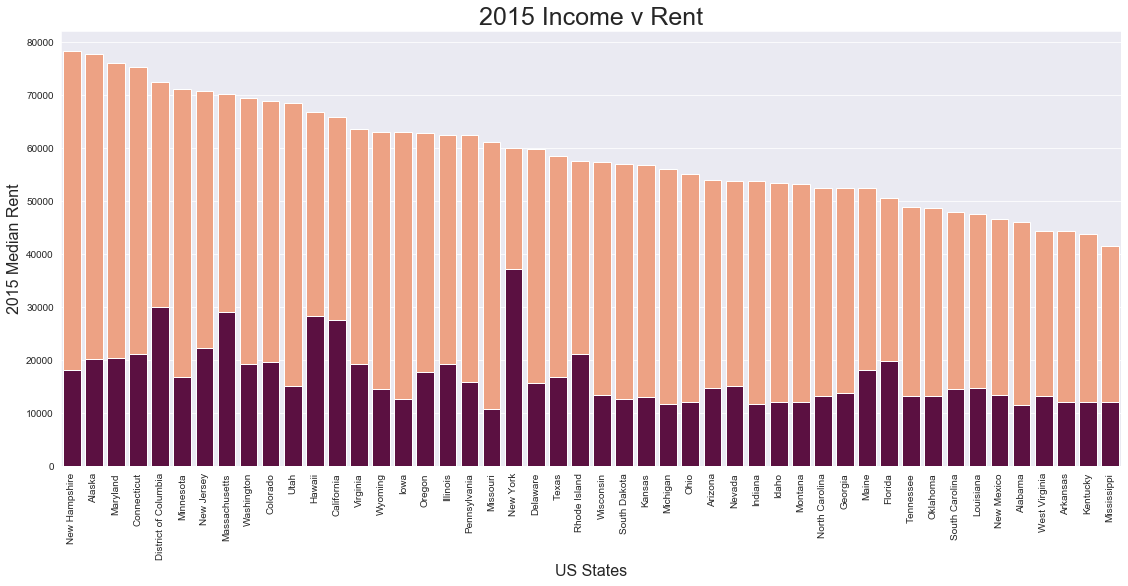

In [3]:
sns.set_style("darkgrid")

x = pi_2015income['State']
y = pi_2015income['2015 Income']

x2 = pi_2015income['State']
y2 = pi_2015rent['2015 Yearly Rent']

fig, ax1 = plt.subplots(figsize=(19,8))

g= sns.barplot(x=x, y=y, color='#ff9a72', ax=ax1, alpha=1 )
g2= sns.barplot(x=x2, y=y2, color='#670445')

plt.title("2015 Income v Rent", size=25)
g.set_xticklabels(labels=x,rotation=90)
g.set_xlabel("US States", size=16)
g.set_ylabel("2015 Median Rent", size=16)

# Stacked Bar Graph 2015

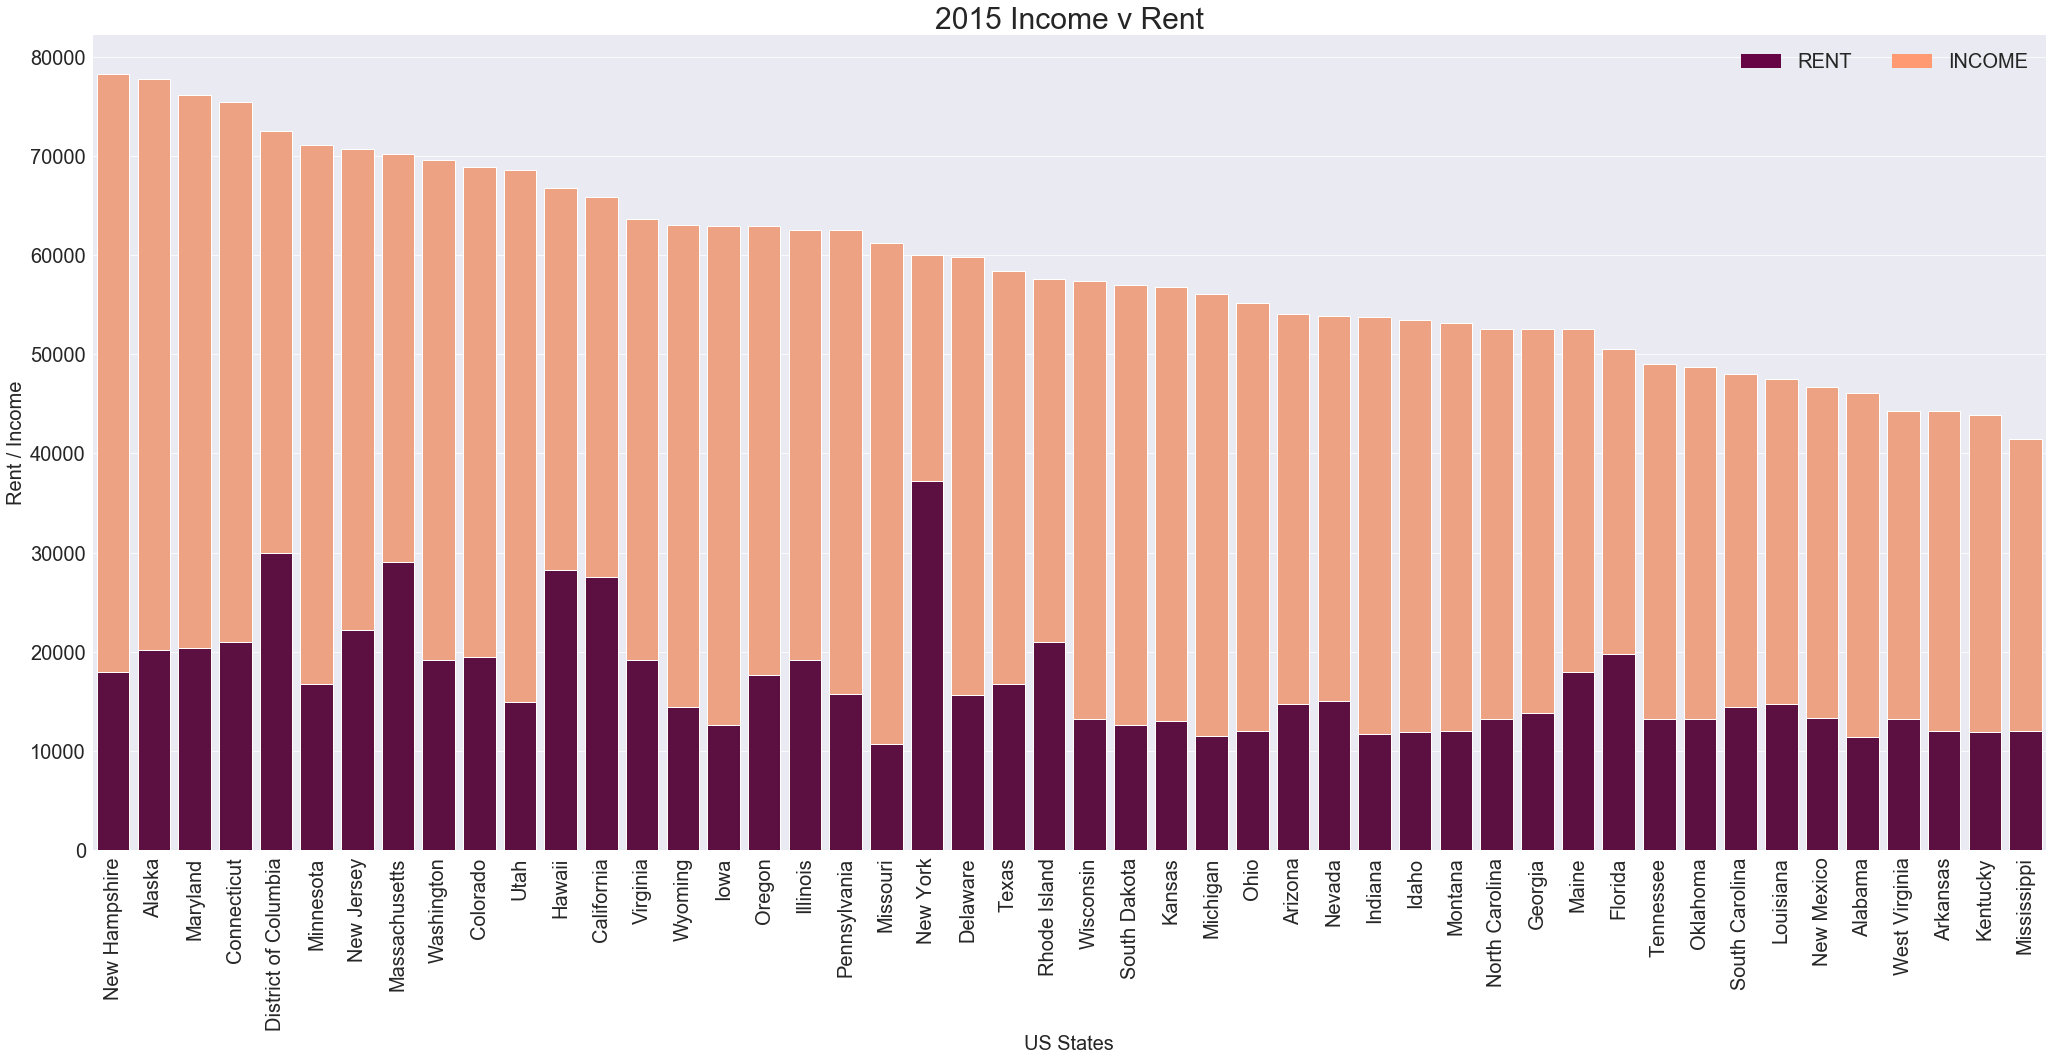

In [4]:
%matplotlib inline

State2015 = pi_2015income['State']
Income2015 = pi_2015income['2015 Income']

State2015 = pi_2015income['State']
Rent2015 = pi_2015income['2015 Yearly Rent']

#Read in data & create total column
pi_2015income['bar_total_2015'] = pi_2015income['2015 Income'] + pi_2015income['2015 Yearly Rent']


#Set general plot properties
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (35, 15)})
plt.title("2015 Income v Rent", size=30)

#Plot 1 - background - "total" (top) series
sns.barplot(x = State2015, y = Income2015, color = "#ff9a72")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = State2015, y = Rent2015, color = "#670445")

topbar = plt.Rectangle((0,0),1,1,fc="#ff9a72", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#670445',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['RENT', 'INCOME'], loc=1, ncol = 2, prop={'size':20})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_xticklabels(labels=State2015, rotation=90)

bottom_plot.set_ylabel("Rent / Income")
bottom_plot.set_xlabel("US States")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(20)
plt.savefig("../outut_data/Income_Rent_Output/2015stackedbar.png")

# Stacked Bar Graph 2016

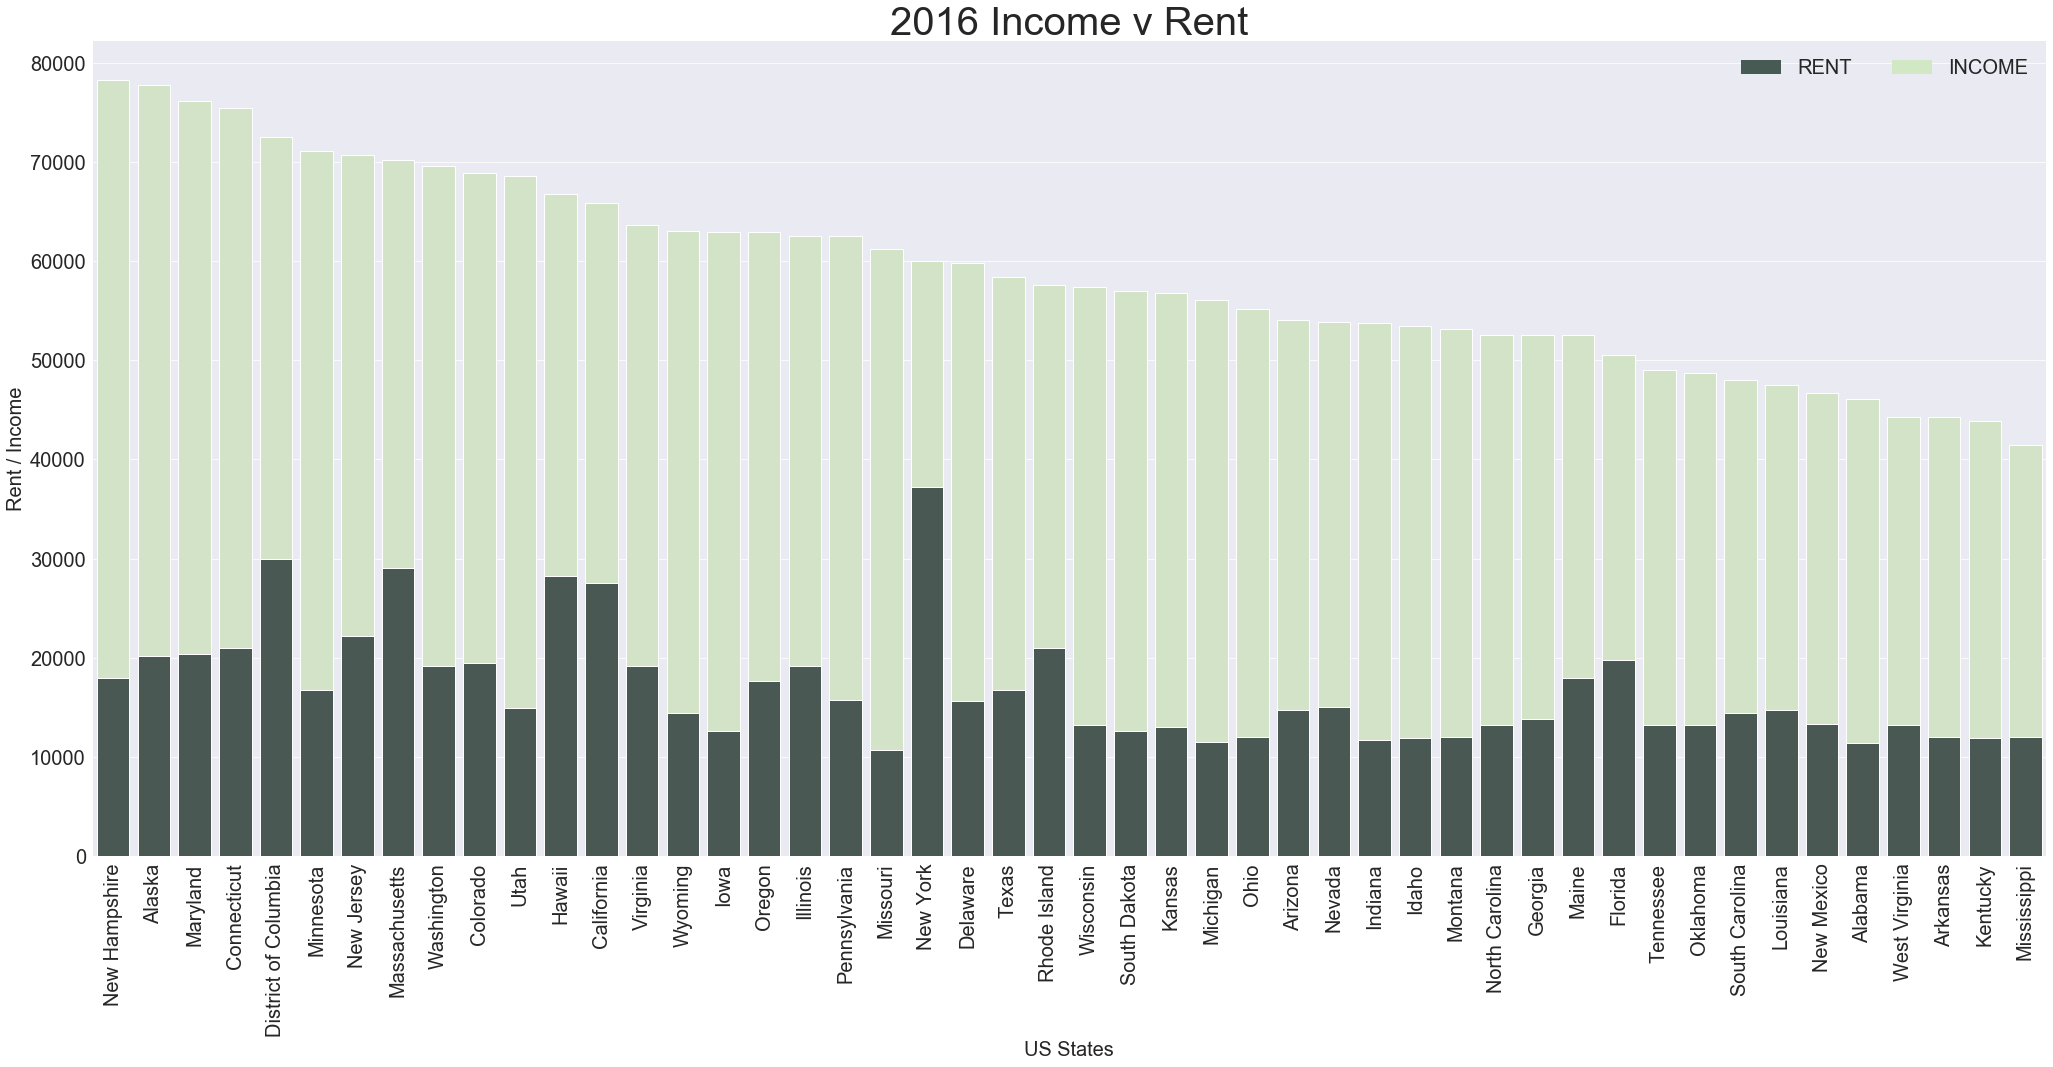

In [5]:
%matplotlib inline

State2016 = pi_2016income['State']
Income2016 = pi_2016income['2016 Income']

State2016 = pi_2016income['State']
Rent2016 = pi_2016income['2016 Yearly Rent']

#Read in data & create total column
pi_2016income['bar_total_2016'] = pi_2016income['2016 Income'] + pi_2016income['2016 Yearly Rent']

#Set general plot properties
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (35, 15)})
plt.title("2016 Income v Rent", size=40)

#Plot 1 - background - "total" (top) series
sns.barplot(x = State2015, y = Income2015, color = "#d2e7c4")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = State2015, y = Rent2015, color = "#485a54")

topbar = plt.Rectangle((0,0),1,1,fc="#d2e7c4", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#485a54',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['RENT', 'INCOME'], loc=1, ncol = 2, prop={'size':20})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_xticklabels(labels=State2015, rotation=90)

bottom_plot.set_ylabel("Rent / Income")
bottom_plot.set_xlabel("US States")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(20)
plt.savefig("../outut_data/Income_Rent_Output/2016stackedbar.png")

# Stacked Bar Graph 2017

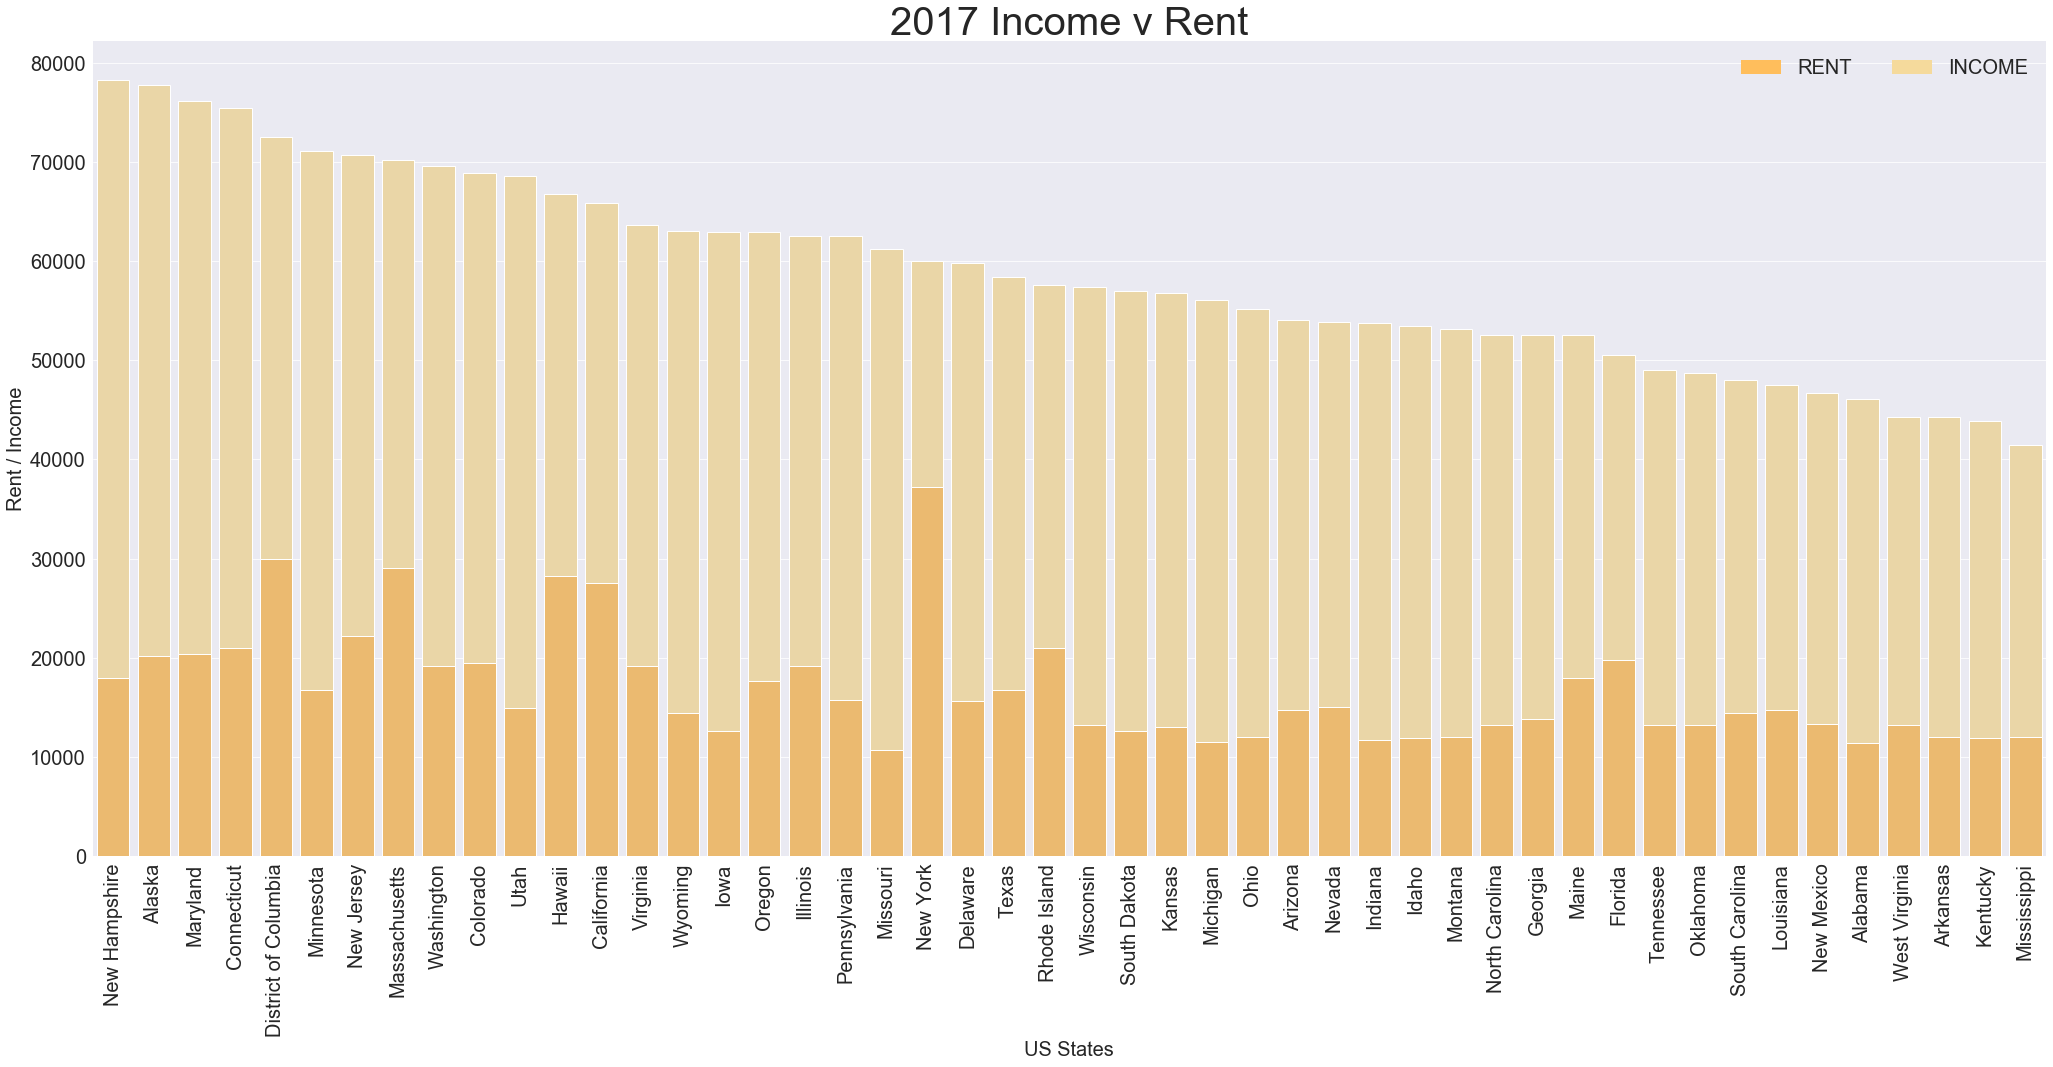

In [6]:
%matplotlib inline

State2017 = pi_2017income['State']
Income2017 = pi_2017income['2017 Income']

State2017 = pi_2017income['State']
Rent2017 = pi_2017income['2017 Yearly Rent']

#Read in data & create total column
pi_2017income['bar_total_2017'] = pi_2017income['2017 Income'] + pi_2017income['2017 Yearly Rent']

#Set general plot properties
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (35, 15)})
plt.title("2017 Income v Rent", size=40)

#Plot 1 - background - "total" (top) series
sns.barplot(x = State2015, y = Income2015, color = "#f5da9c")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = State2015, y = Rent2015, color = "#ffbe5c")

topbar = plt.Rectangle((0,0),1,1,fc="#f5da9c", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#ffbe5c',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['RENT', 'INCOME'], loc=1, ncol = 2, prop={'size':20})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_xticklabels(labels=State2015, rotation=90)

bottom_plot.set_ylabel("Rent / Income")
bottom_plot.set_xlabel("US States")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(20)
plt.savefig("../outut_data/Income_Rent_Output/2017stackedbar.png")

In [7]:
#Highest/Lowest Rent 2015
highest_rent_2015 = pi_2015rent.head(10)
lowest_rent_2015 = pi_2015rent.tail(10)
#Highest/Lowest Rent 2016
highest_rent_2016 = pi_2016rent.head(10)
lowest_rent_2016 = pi_2016rent.tail(10)
#Highest/Lowest Rent 2017
highest_rent_2017 = pi_2017rent.head(10)
lowest_rent_2017 = pi_2017rent.tail(10)

#Highest/Lowest Income 2015
highest_income_2015 = pi_2015income.head(10)
lowest_income_2015 = pi_2015income.tail(10)
#Highest/Lowest Income 2016
highest_income_2016 = pi_2016income.head(10)
lowest_income_2016 = pi_2016income.tail(10)
#Highest/Lowest Income 2017
highest_income_2017 = pi_2017income.head(10)
lowest_income_2017 = pi_2017income.tail(10)

